# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




(32, 32, 3)


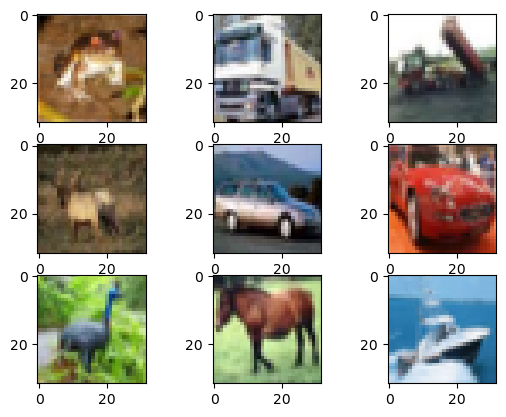

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

let_see = cifar10.load_data()
print(let_see[0][0][1].shape)

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

(50000, 32, 32, 3)


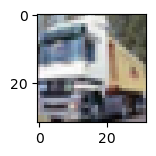

In [2]:
plt.subplot(330 + 1 + i)
plt.imshow(let_see[0][0][1], cmap = plt.get_cmap('gray'))

print(let_see[0][0].shape)

In [3]:
# Your code here :
display("x_train: ", x_train.shape)
display("y_train: ", y_train.shape)

display("x_test: ", x_test.shape)
display("y_test: ", y_test.shape)

print(y_test)

'x_train: '

(50000, 32, 32, 3)

'y_train: '

(50000, 1)

'x_test: '

(10000, 32, 32, 3)

'y_test: '

(10000, 1)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_train.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Your code here :
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

trained_model = model.fit(x_train, y_train, batch_size=512, epochs=50)

print(x_train.shape)
print(y_train.shape)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1869 - loss: 2.2082
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3002 - loss: 1.9720
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3535 - loss: 1.8590
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3733 - loss: 1.7966 
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3965 - loss: 1.7424
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4103 - loss: 1.6883
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4290 - loss: 1.6412
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4384 - loss: 1.6137
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4522 - loss: 1.5782
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4624 - loss: 1.5378
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4748 - loss: 1.5100
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.474

*   Plot the cross entropy loss curve and the accuracy curve

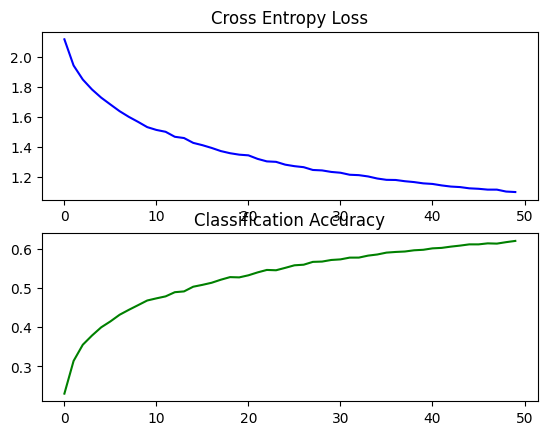

In [7]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(trained_model.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(trained_model.history['accuracy'], color='green', label='train')
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5906 - loss: 1.1705
Test loss: 1.1759464740753174
Test accuracy: 0.5893999934196472


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
cifar = Sequential()

cifar.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
cifar.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
cifar.add(MaxPooling2D((2, 2)))
cifar.add(Flatten())
cifar.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cifar.add(Dense(10, activation='relu'))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
cifar.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

trained_cifar = cifar.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1073 - loss: 5.1580
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2192 - loss: 4.6931
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1890 - loss: 3.4945
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2407 - loss: 3.4047
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1177 - loss: 3.7292
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2022 - loss: 3.5548
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1353 - loss: 3.4703
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1300 - loss: 5.1004
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0997 - loss: 3.6572
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1002 - loss: 3.5705
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0997 - loss: 3.5566
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


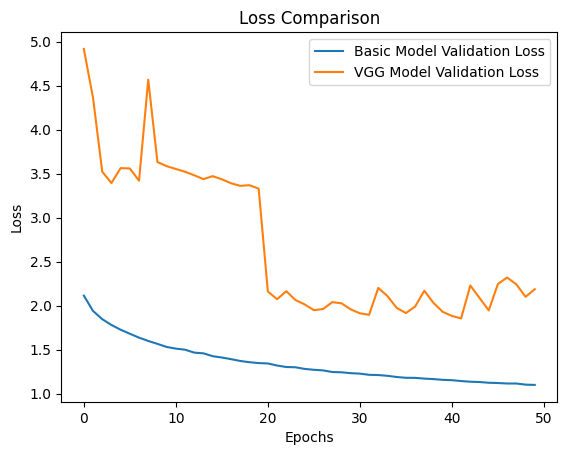

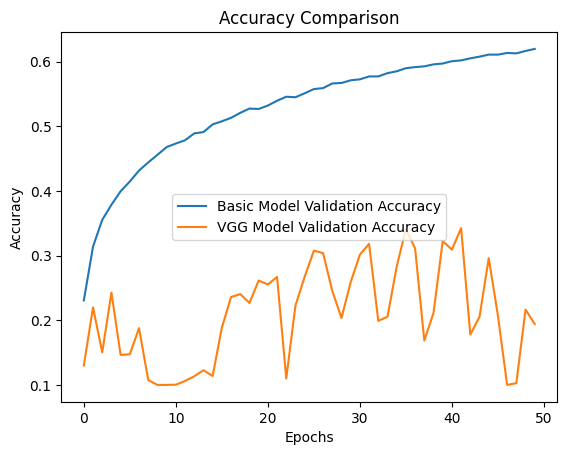

In [12]:
# Your code here :
# Plot both models' loss curves
plt.plot(trained_model.history['loss'], label='Basic Model Validation Loss')
plt.plot(trained_cifar.history['loss'], label='VGG Model Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot both models' accuracy curves
plt.plot(trained_model.history['accuracy'], label='Basic Model Validation Accuracy')
plt.plot(trained_cifar.history['accuracy'], label='VGG Model Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Comment on the observation**

*The basic validation proved more accurate and with fewer loss then VGG model.*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [13]:
# Your code here :
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = cifar.predict(x_test)
print(predictions[0])

predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[6.1383414  5.2117     5.1046243  6.521014   5.1693797  4.6868024
 4.1992583  2.688633   5.6747427  0.82392275]


array([[671, 133,   8, 121,   0,   0,   3,  22,  12,  30],
       [237, 528,   4,  73,   1,   2,  23,  21,  37,  74],
       [190, 102,  32, 588,  14,   0,  23,  25,   3,  23],
       [ 85,  98,  16, 697,   3,   1,  21,  41,  10,  28],
       [110,  51,  44, 683,  34,   0,  31,  23,   4,  20],
       [ 62,  92,  35, 735,   3,   1,  18,  29,   9,  16],
       [ 31,  85,  14, 683,  13,   0, 142,  17,   2,  13],
       [ 82, 136,  24, 469,   4,   1,   8, 175,   5,  96],
       [580, 179,   3,  81,   0,   0,   3,  11,  91,  52],
       [258, 268,   6, 112,   0,   1,   9,  48,  33, 265]])

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :
test_loss, test_acc = cifar.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2626 - loss: 2.0596
Test loss: 2.0560736656188965
Test accuracy: 0.2635999917984009


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [23]:
from keras.backend import clear_session
clear_session()

In [4]:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'tensorflow'


In [24]:
# Your code here :
complete_cifar = Sequential()

complete_cifar.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
complete_cifar.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(MaxPooling2D((2, 2)))

complete_cifar.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(MaxPooling2D((2, 2)))

complete_cifar.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(MaxPooling2D((2, 2), padding='same'))

complete_cifar.add(Flatten())
complete_cifar.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
complete_cifar.add(Dense(10, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [25]:
# Your code here :
complete_cifar.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [26]:
trained_complete_cifar = complete_cifar.fit(x_train, y_train, batch_size=512, epochs=10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.1083 - loss: 5.3336
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1284 - loss: 5.6618
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1046 - loss: 5.8883
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.1558 - loss: 4.7701
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.1448 - loss: 2.1833
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.2189 - loss: 2.0999
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.1872 - loss: 2.1299
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.0998 - loss: 2.3884
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.1073 - loss: 2.2908
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.1523 - loss: 2.2742


In [27]:
predictions = complete_cifar.predict(x_test)
print(predictions[0])

predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)

confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[13.783001  14.8099785 14.778267  15.5914345 15.0516205 14.999976
 14.3633375 14.901426  13.581025  13.431929 ]


array([[ 55,   7,   6, 456,  58,   6,   4,  77, 118, 213],
       [ 15,  21,   0, 383, 107,   7,  28,  49,  73, 317],
       [ 10,  15,   8, 269, 401,  24,  10, 147,  23,  93],
       [  3,   9,   6, 287, 416,  41,   9, 134,   8,  87],
       [  4,  13,   2, 146, 575,  18,  20, 140,  13,  69],
       [  2,  13,   4, 333, 370,  48,   6, 133,  10,  81],
       [  5,  13,   4,  66, 694,  14,  50,  99,   2,  53],
       [  5,  22,   2, 177, 343,  30,  10, 217,  16, 178],
       [  9,   6,   2, 337,  49,   5,   2,  46, 199, 345],
       [  8,  10,   4, 224, 128,   8,   9, 111,  86, 412]])

In [28]:
test_loss, test_acc = complete_cifar.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1859 - loss: 2.2446
Test loss: 2.244274854660034
Test accuracy: 0.18719999492168427


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

To transform the summed weighted input from the node into an output value to be fed to the next hidden layer or as output.


2 - Key Differences between sigmoid and softmax:

Sigmoid - used for binary classification tasks.
Softmax - used for multi-class classification tasks.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Both are loss functions for classification tasks but for different scenarios.

Categorical crossentropy - used for multi-class classification problems.
Binary crossentropy - used for binary classification problems.